In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Financials.csv")

In [45]:
df_copy = df.copy()

In [46]:
df_copy.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [84]:
df_copy['Discount Band'].value_counts()

Discount Band
High       245
Medium     242
Low        160
None        53
Name: count, dtype: int64

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

# Data Cleaning

In [48]:
df_copy.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [49]:
df_copy.columns = ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit' , 'Date', 'Month Number',
       'Month Name', 'Year']

In [50]:
df_copy.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [51]:
columns_to_clean = ['Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit']

In [52]:
# Defining a function to remove $ from all columns
def remove_dollar_comma_sign(value):
    if isinstance(value, str):
        return value.replace('$', '').strip().replace(',', '')  # Remove $, comma, any extra spaces and (-)
    return value

In [53]:
# In Profit column negative numbers are reprented within parentheres, we need to fix that

def convert_paranthesis(value):
    if isinstance(value, str):
        if value.startswith("(") and value.endswith(")"):
            return -float(value.replace("(", '').replace(")", ''))
        return float(value)

In [54]:
for col in columns_to_clean:
    df_copy[[col]] = df_copy[[col]].applymap(remove_dollar_comma_sign)
    df_copy[col] = df_copy[col].replace("-", np.nan)
    df_copy[[col]] = df_copy[[col]].applymap(convert_paranthesis).astype(float)

In [55]:
df_copy

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.00,16185.0,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.00,13210.0,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.00,21780.0,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.00,8880.0,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.00,24700.0,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


In [56]:
df_copy["Date"] = pd.to_datetime(df_copy["Date"])

In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            647 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               695 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [58]:
df_copy.duplicated().sum()

0

In [59]:
df_copy.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [60]:
df_copy.fillna(0,inplace=True)

In [61]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
Units Sold,700.0,1608.294286,200.0,905.0,1542.5,2229.125,4492.5,867.427859
Manufacturing Price,700.0,96.477143,3.0,5.0,10.0,250.0,260.0,108.602612
Sale Price,700.0,118.428571,7.0,12.0,20.0,300.0,350.0,136.775515
Gross Sales,700.0,182759.426429,1799.0,17391.75,37980.0,279025.0,1207500.0,254262.284378
Discounts,700.0,13150.354671,0.0,800.32,2585.25,15956.3475,149677.5,22962.92876
Sales,700.0,169609.071843,1655.08,15928.0,35540.2,261077.5,1159200.0,236726.346899
COGS,700.0,145475.211429,918.0,7490.0,22506.25,245607.5,950625.0,203865.506118
Profit,700.0,24133.860414,-40617.5,2805.96,9242.2,22662.0,262200.0,42760.626547
Date,700,2013-10-08 15:36:00,2013-01-09 00:00:00,2013-10-04 12:00:00,2014-01-05 12:00:00,2014-01-09 06:00:00,2014-01-12 00:00:00,NaN
Month Number,700.0,7.9,1.0,5.75,9.0,10.25,12.0,3.377321


# Data Visualization

In [62]:
grouped_by_dates = df_copy.groupby("Date").agg({"Sales":"sum", "Profit":"sum"}).reset_index()
grouped_by_dates

,Date,Sales,Profit
0,2013-01-09,4484000.03,763603.03
1,2013-01-10,9295611.10,1657795.10
2,2013-01-11,7267203.30,765502.30
3,2013-01-12,5368441.08,691564.08
4,2014-01-01,6607761.69,814028.69
5,2014-01-02,7297531.39,1148547.39
6,2014-01-03,5586859.87,669866.87
7,2014-01-04,6964775.08,929984.58
8,2014-01-05,6210211.06,828640.06
9,2014-01-06,9518893.82,1473753.82


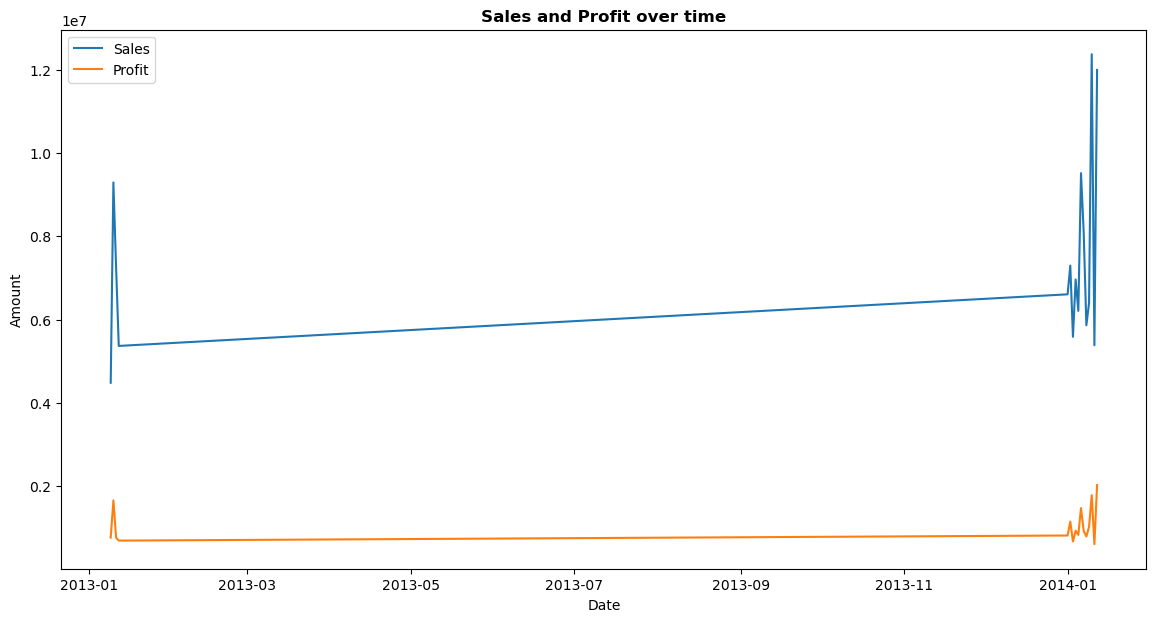

In [63]:
# Ploting Sales and Profit over time

plt.figure(figsize=(14,7))

plt.plot(grouped_by_dates["Date"], grouped_by_dates["Sales"], label="Sales")
plt.plot(grouped_by_dates["Date"], grouped_by_dates["Profit"], label="Profit")
plt.title("Sales and Profit over time", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Amount")

plt.ylim()
plt.legend()
plt.show();

In [64]:
# Counties grouped by Sales and Profit
grouped_countries = (df_copy.groupby("Country")
                     .agg({"Sales":"sum", "Profit":"sum"})
                     .sort_values(by="Sales", ascending=False)
                     .reset_index()
                    )

grouped_countries

,Country,Sales,Profit
0,United States of America,25029830.18,2995540.68
1,Canada,24887654.89,3529228.89
2,France,24354172.29,3781020.79
3,Germany,23505340.82,3680388.82
4,Mexico,20949352.11,2907523.11


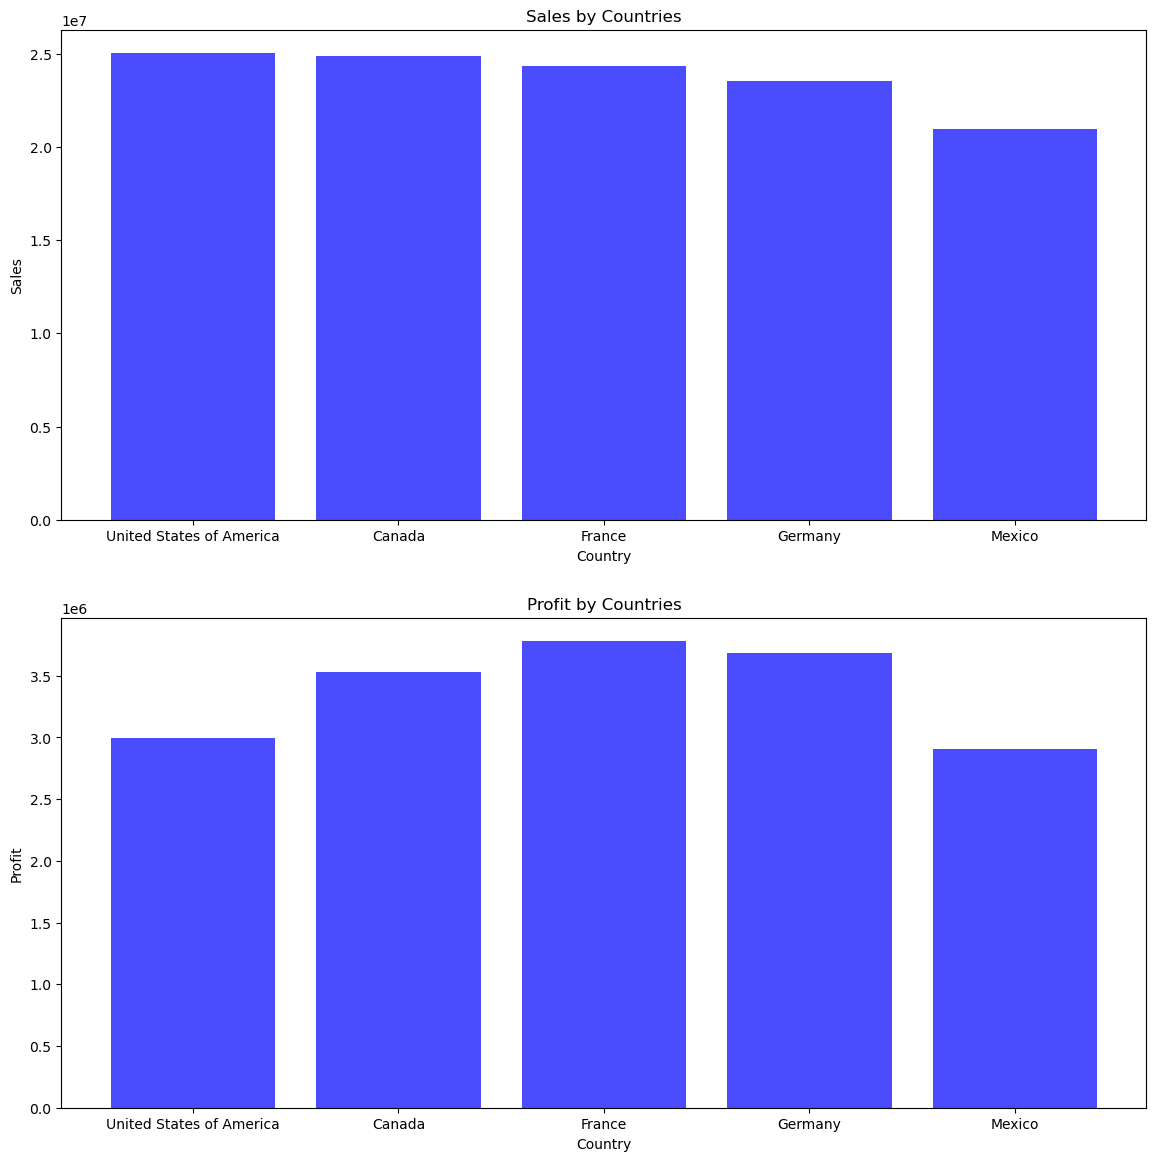

In [65]:
fig, ax = plt.subplots(2,1 , figsize=(14, 14))

ax[0].bar(x=grouped_countries["Country"],
          height=grouped_countries["Sales"],
         color='blue',
         alpha=0.7)
ax[0].set_title("Sales by Countries")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Sales")


ax[1].bar(x=grouped_countries["Country"],
          height=grouped_countries["Profit"],
         color='blue',
         alpha=0.7)
ax[1].set_title("Profit by Countries")
ax[1].set_xlabel("Country")
ax[1].set_ylabel("Profit")


plt.show();

In [66]:
# Group Sales and Profit by Products
grouped_product = (df_copy.groupby("Product")
                     .agg({"Sales":"sum", "Profit":"sum"})
                     .sort_values(by="Sales", ascending=False)
                     .reset_index()
                    )

grouped_product

,Product,Sales,Profit
0,Paseo,33011143.96,4797437.96
1,VTT,20511921.02,3034608.02
2,Velo,18250059.47,2305992.47
3,Amarilla,17747116.07,2814104.07
4,Montana,15390801.88,2114754.88
5,Carretera,13815307.89,1826804.89


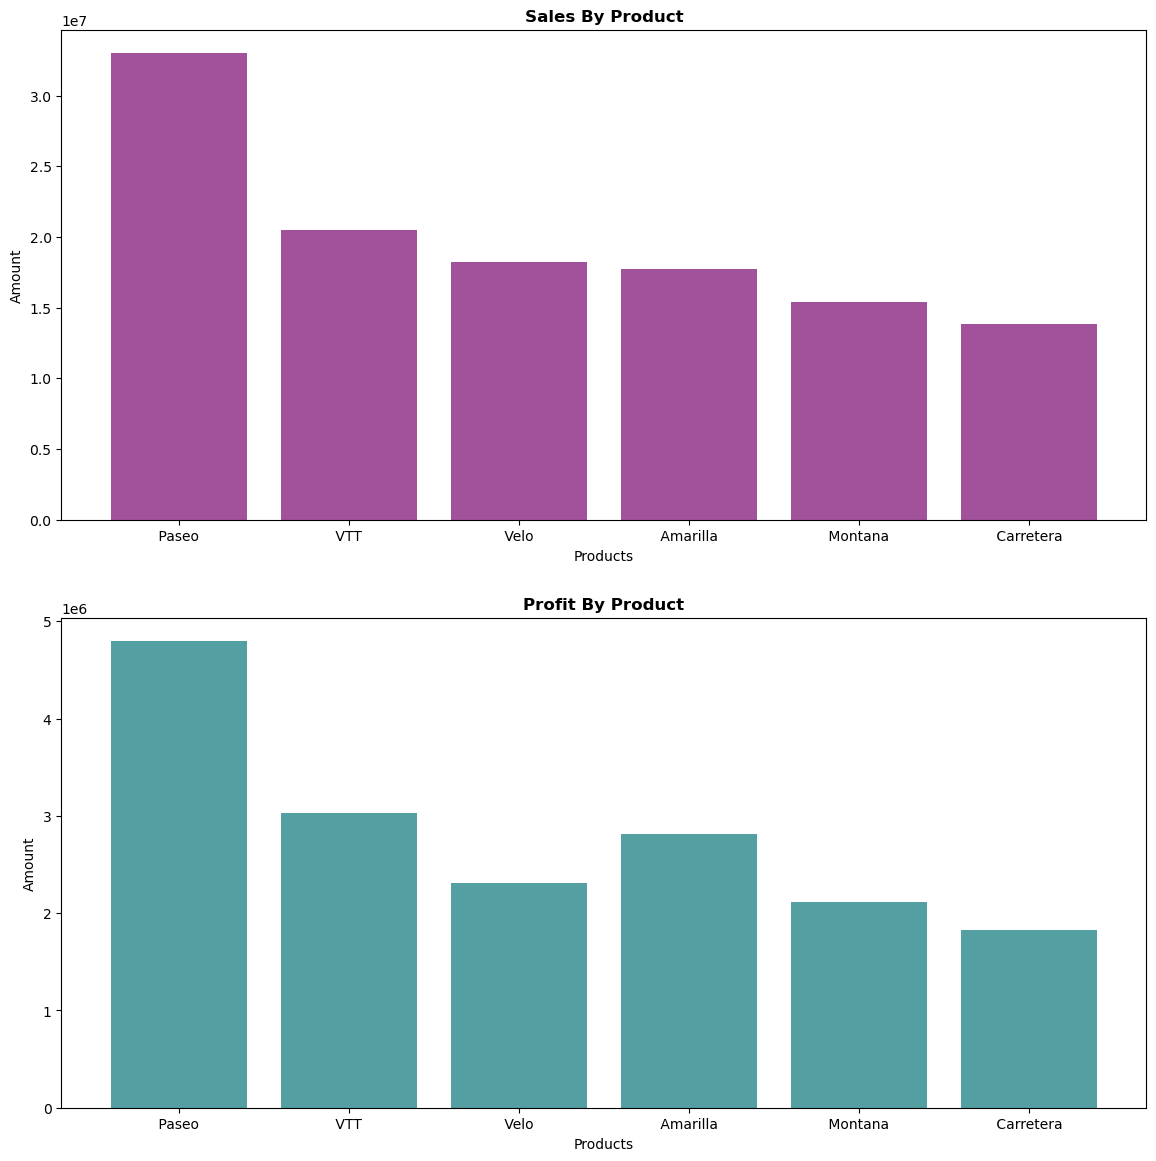

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_product["Product"], grouped_product["Sales"], color='#7a0971', alpha=0.7)
ax[0].set_title("Sales By Product", fontweight='bold')
ax[0].set_xlabel("Products")
ax[0].set_ylabel("Amount")

ax[1].bar(grouped_product["Product"], grouped_product["Profit"], color='#0c777a', alpha=0.7)
ax[1].set_title("Profit By Product", fontweight='bold')
ax[1].set_xlabel("Products")
ax[1].set_ylabel("Amount")

plt.show()

In [68]:
# Group Sales and Profit by Segment
grouped_segment = (df_copy.groupby("Segment")
                     .agg({"Sales":"sum", "Profit":"sum"})
                     .sort_values(by="Sales", ascending=False)
                     .reset_index()
                    )

grouped_segment

,Segment,Sales,Profit
0,Government,52504260.68,11388173.18
1,Small Business,42427918.50,4143168.50
2,Enterprise,19611694.38,-614545.62
3,Midmarket,2381883.09,660103.09
4,Channel Partners,1800593.64,1316803.14


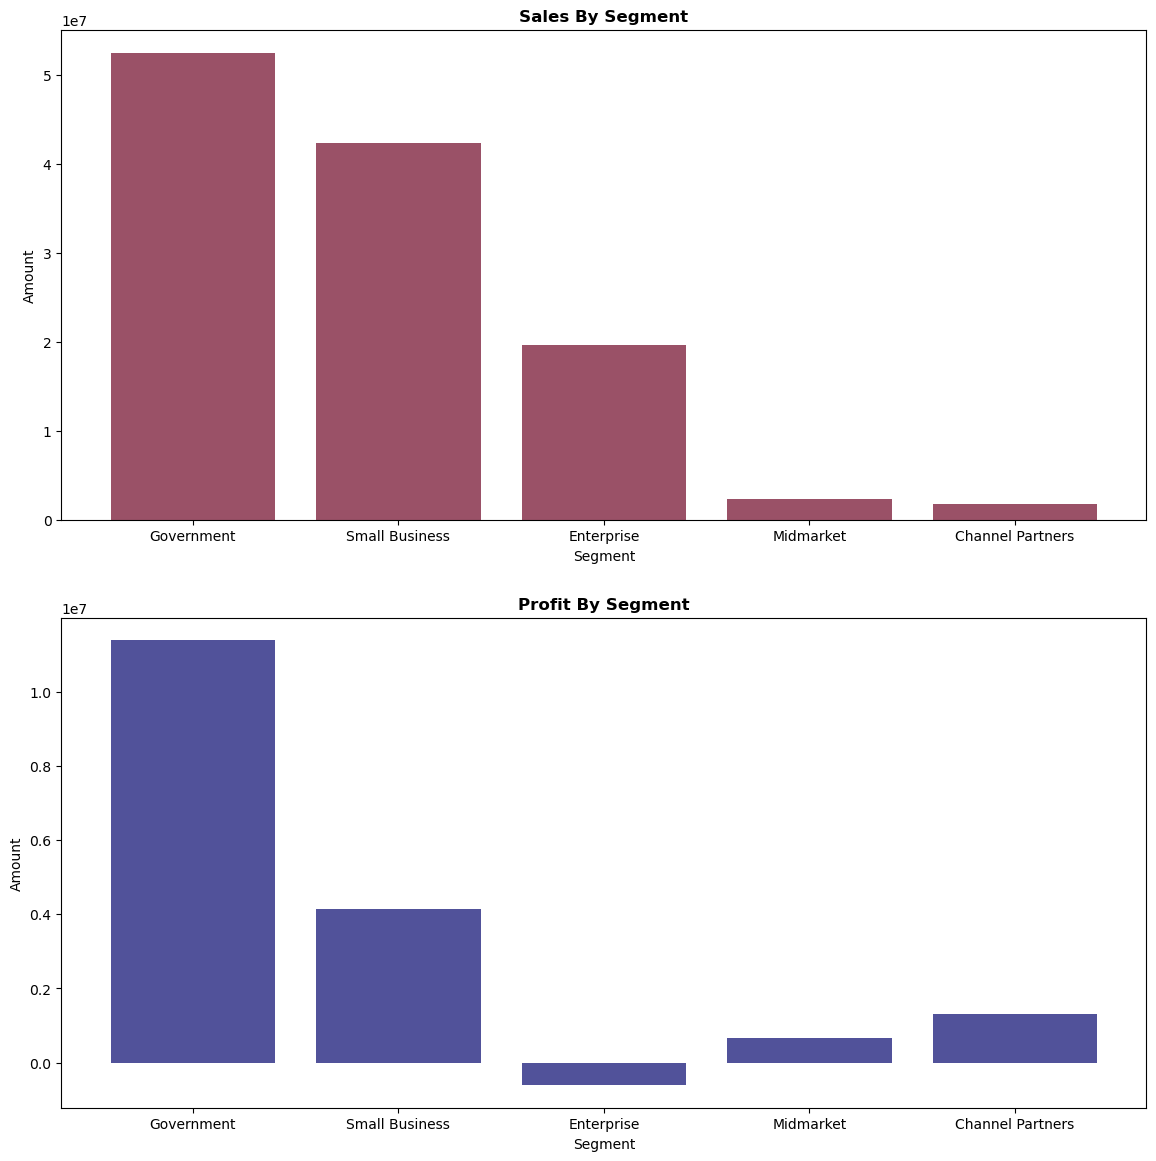

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_segment["Segment"], grouped_segment["Sales"], color='#700726', alpha=0.7)
ax[0].set_title("Sales By Segment", fontweight='bold')
ax[0].set_xlabel("Segment")
ax[0].set_ylabel("Amount")

ax[1].bar(grouped_segment["Segment"], grouped_segment["Profit"], color='#070870', alpha=0.7)
ax[1].set_title("Profit By Segment", fontweight='bold')
ax[1].set_xlabel("Segment")
ax[1].set_ylabel("Amount")

plt.show()

In [70]:
# Group Sales and Profit by Month wise
grouped_month = (df_copy.groupby(["Month Number","Month Name"])
                     .agg({"Sales":"sum", "Profit":"sum"})
                     .reset_index()
                    )

grouped_month

,Month Number,Month Name,Sales,Profit
0,1,January,6607761.69,814028.69
1,2,February,7297531.39,1148547.39
2,3,March,5586859.87,669866.87
3,4,April,6964775.08,929984.58
4,5,May,6210211.06,828640.06
5,6,June,9518893.82,1473753.82
6,7,July,8102920.19,923865.69
7,8,August,5864622.42,791066.42
8,9,September,10882697.27,1786735.27
9,10,October,21671431.02,3439781.02


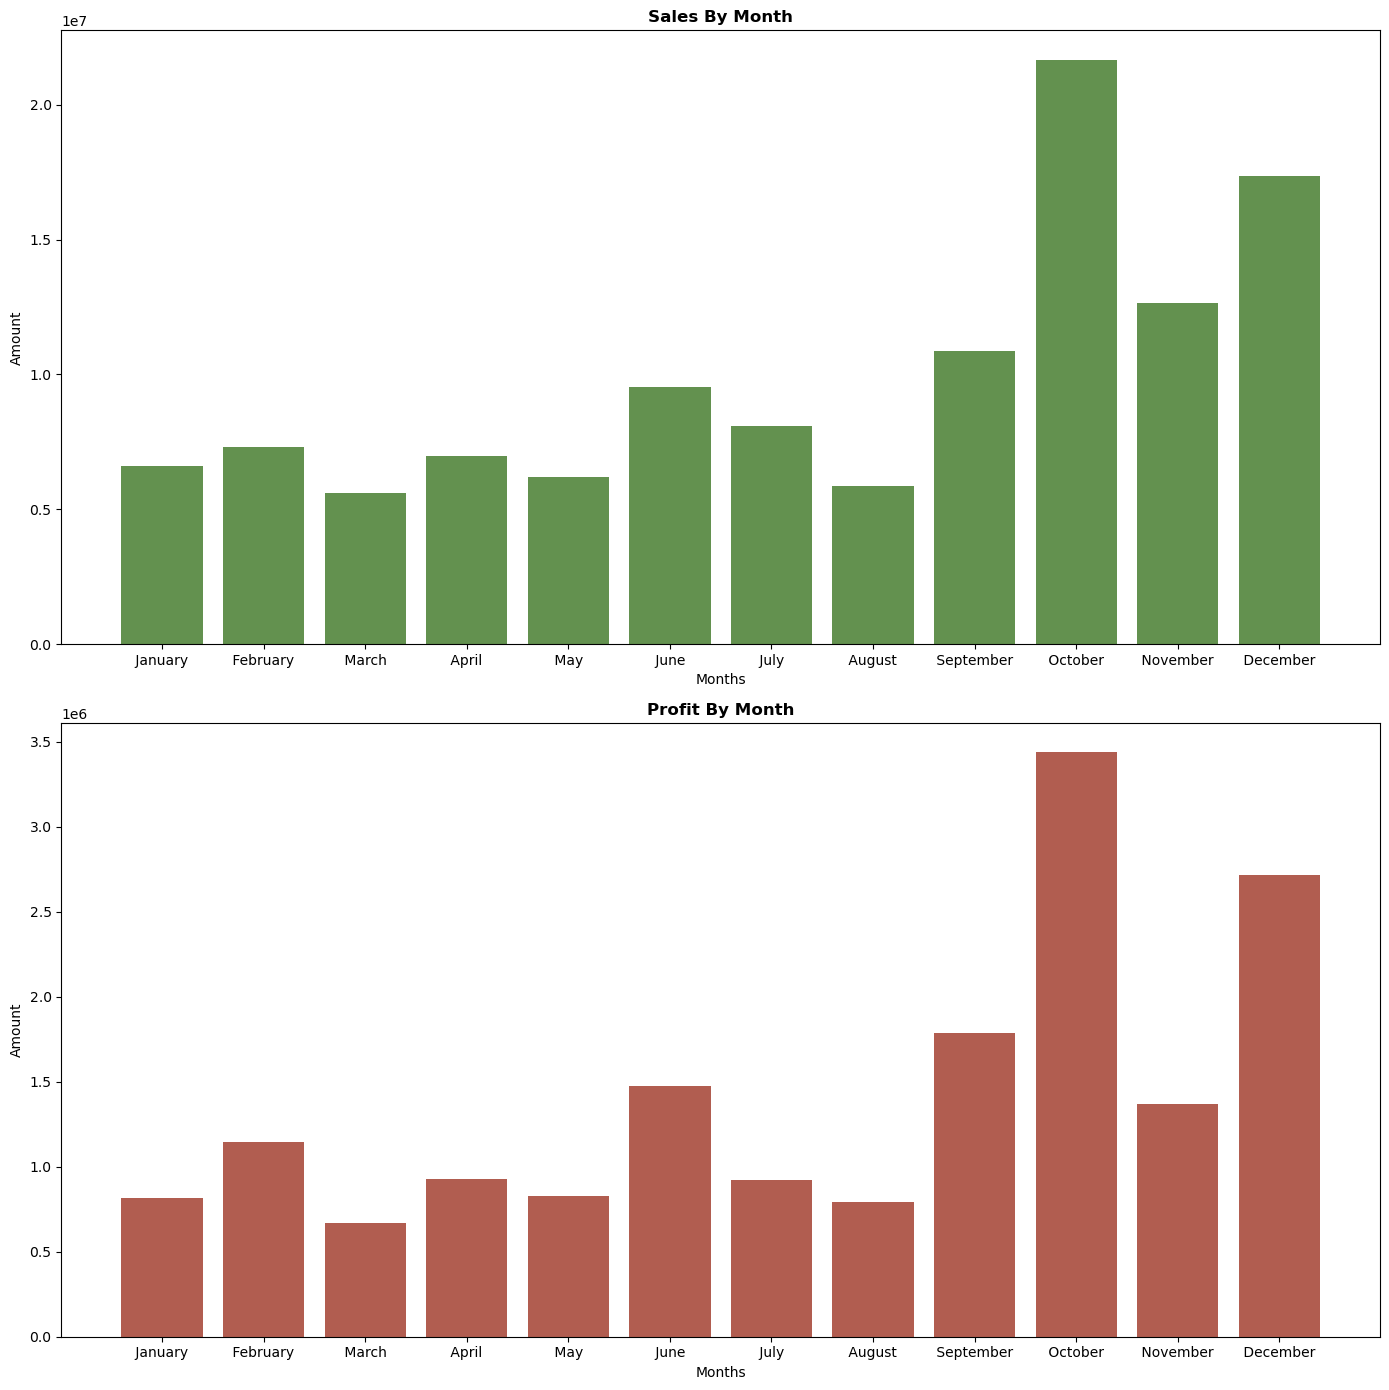

In [71]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_month["Month Name"], grouped_month["Sales"], color='#216304', alpha=0.7)
ax[0].set_title("Sales By Month", fontweight='bold')
ax[0].set_xlabel("Months")
ax[0].set_ylabel("Amount")

ax[1].bar(grouped_month["Month Name"], grouped_month["Profit"], color='#911806', alpha=0.7)
ax[1].set_title("Profit By Month", fontweight='bold')
ax[1].set_xlabel("Months")
ax[1].set_ylabel("Amount")

#ax[1] = ax[0].twiny()
plt.tight_layout()
plt.show()

In [72]:
# Corelation between Discount Band and Sales

product_segment_crosstab = pd.crosstab(df_copy['Product'], df_copy['Segment'])
product_segment_crosstab

Segment,Channel Partners,Enterprise,Government,Midmarket,Small Business
Product,,,,,
Amarilla,16,12,42,12,12
Carretera,18,15,36,12,12
Montana,12,12,42,12,15
Paseo,26,26,88,36,26
VTT,14,14,46,14,21
Velo,14,21,46,14,14


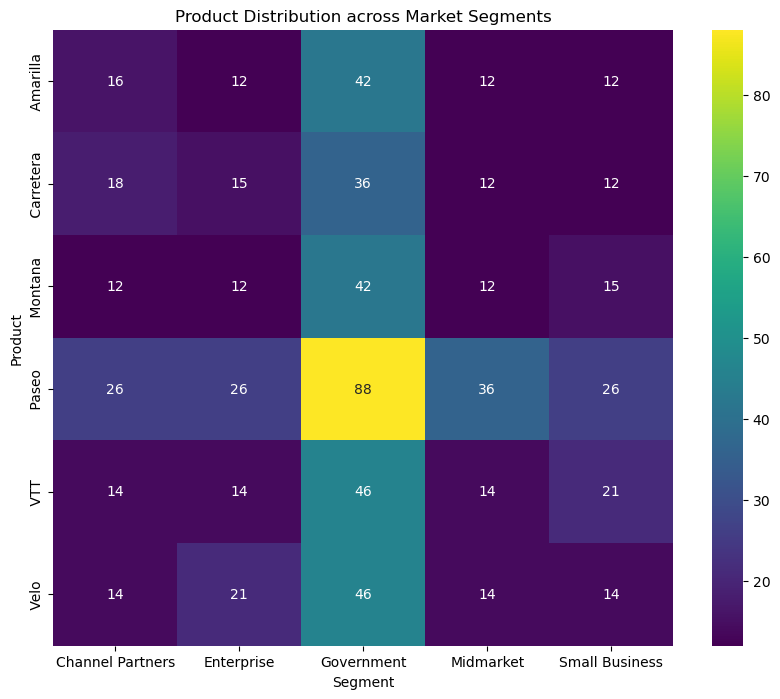

In [73]:
# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Product Distribution across Market Segments')
plt.show()

In [74]:
# Create a cross-section Sales in each country by segment

sale_country_segment = df_copy.pivot_table(index="Country", columns="Segment", values="Sales", aggfunc="sum")
sale_country_segment

Segment,Channel Partners,Enterprise,Government,Midmarket,Small Business
Country,,,,,
Canada,491164.14,3967491.25,10741236.52,510213.98,9177549.0
France,372090.36,3890890.63,12127782.72,593802.08,7369606.5
Germany,336425.88,4086826.25,11452895.94,301344.75,7327848.0
Mexico,234379.08,3315881.25,9791599.38,511136.40,7096356.0
United States of America,366534.18,4350605.00,8390746.12,465385.88,11456559.0


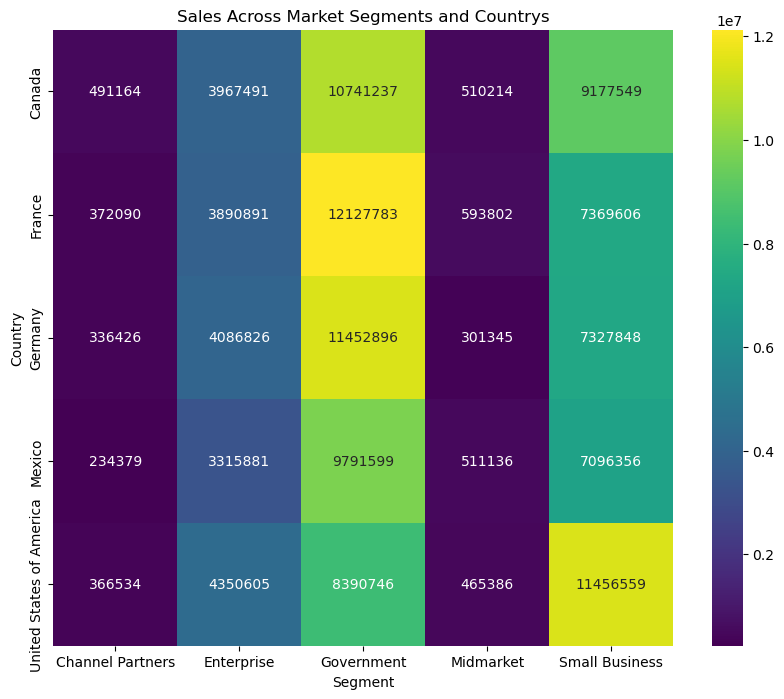

In [75]:
plt.figure(figsize=(10,8))

sns.heatmap(data=sale_country_segment, annot=True, fmt="0.0f", cmap='viridis')
plt.title("Sales Across Market Segments and Countrys")

plt.show()

In [76]:
# Group Sales and Profit by Discount Band
grouped_by_discount_bands = df_copy.groupby("Discount Band").agg({"Sales":"sum", "Profit":"sum"}).reset_index()
grouped_by_discount_bands

,Discount Band,Sales,Profit
0,High,37372486.74,3388866.74
1,Low,34629778.71,6188857.71
2,Medium,38780430.84,5579522.84
3,None,7943654.00,1736455.00


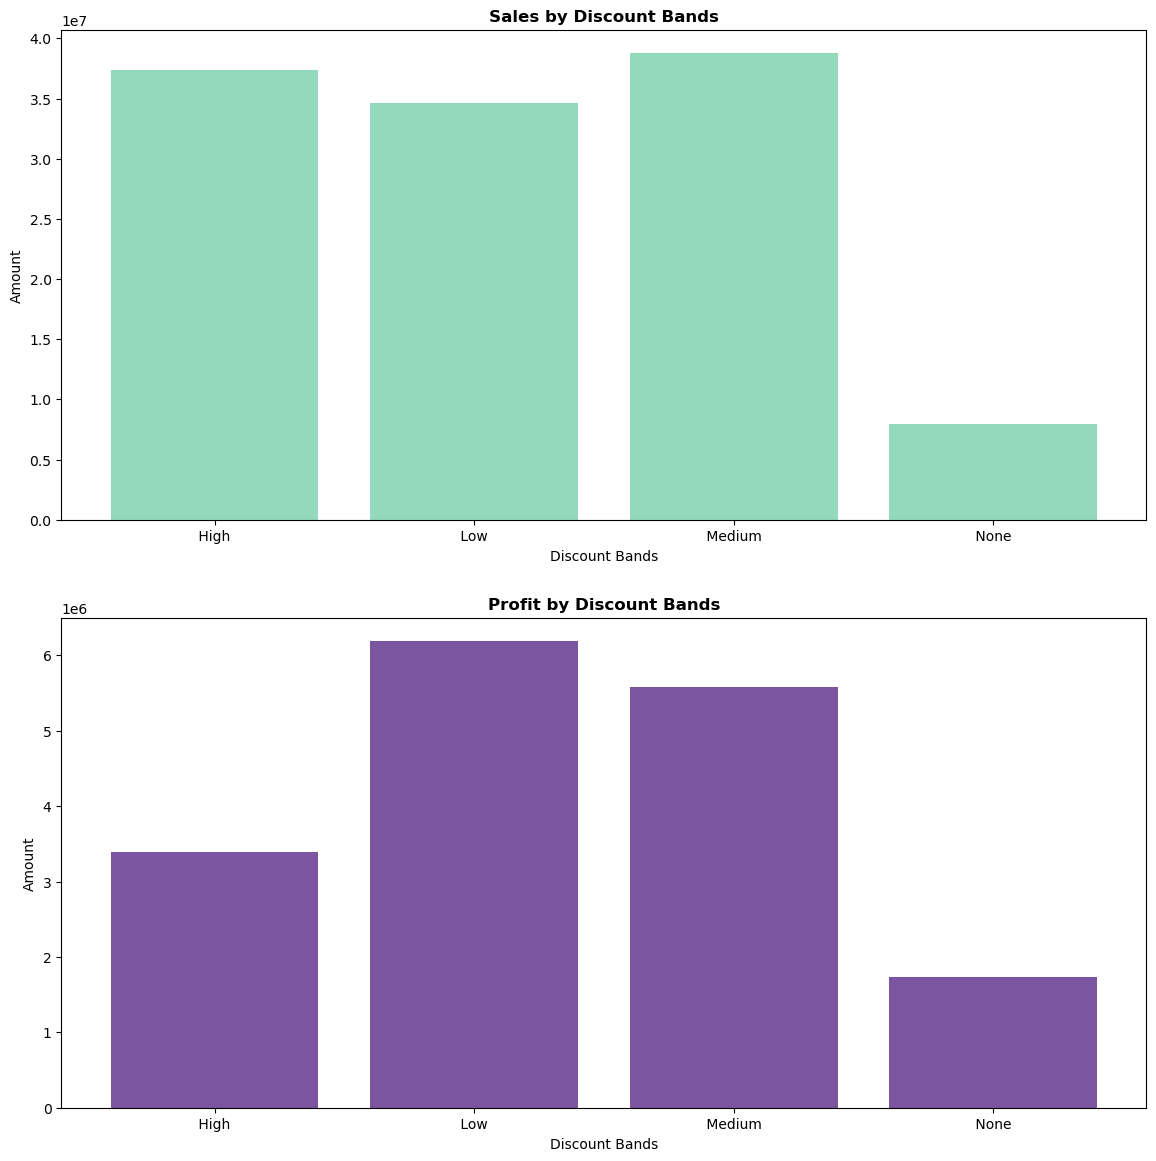

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_by_discount_bands["Discount Band"], grouped_by_discount_bands['Sales'],
         color="#65c99f", alpha=.7)
ax[0].set_title("Sales by Discount Bands", fontweight="bold")
ax[0].set_xlabel("Discount Bands")
ax[0].set_ylabel("Amount")


ax[1].bar(grouped_by_discount_bands["Discount Band"], grouped_by_discount_bands['Profit'],
         color="#440d7a", alpha=.7)
ax[1].set_title("Profit by Discount Bands", fontweight="bold")
ax[1].set_xlabel("Discount Bands")
ax[1].set_ylabel("Amount")


plt.show()

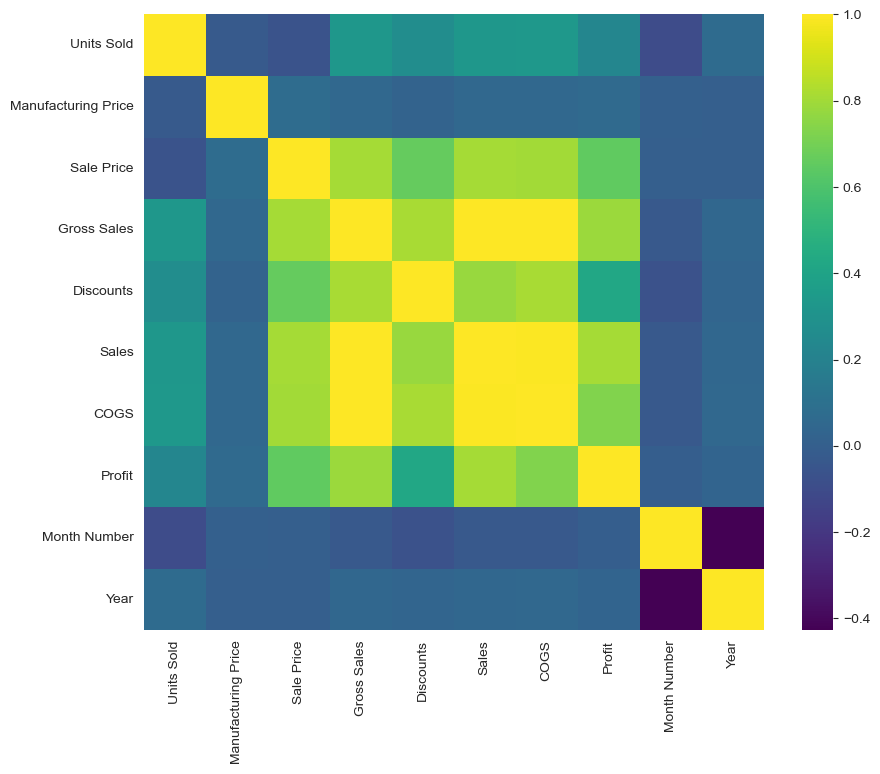

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(df_correlation, cmap="viridis")

plt.show()